In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf
import sklearn

In [2]:
df = pd.read_csv('customers.csv')
df.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation          0
dtype: int64

In [3]:
df_cleaned=df.drop(["ID","Var_1"],axis=1)
df_cleaned.head()
df_cleaned= df_cleaned.dropna(axis=0)
df_cleaned.isnull().sum()
df_col=list(df_cleaned.columns)

In [4]:
data_col_obj=list()
for c in df_col:
  if df_cleaned[c].dtype=='O':
      data_col_obj.append(c)
      
data_col_obj.remove("Segmentation")

data_col_obj

['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score']

In [5]:
df_cleaned[data_col_obj]=OrdinalEncoder().fit_transform(df_cleaned[data_col_obj])
df_cleaned[["Age"]]=MinMaxScaler().fit_transform(df_cleaned[["Age"]])
df_cleaned.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,1.0,0.0,0.056338,0.0,5.0,1.0,2.0,4.0,D
2,0.0,1.0,0.690141,1.0,2.0,1.0,2.0,1.0,B
3,1.0,1.0,0.690141,1.0,7.0,0.0,1.0,2.0,B
5,1.0,1.0,0.535211,0.0,0.0,0.0,0.0,2.0,C
6,1.0,0.0,0.197183,1.0,5.0,1.0,2.0,3.0,C


In [6]:
df_cleaned['Segmentation'] = LabelEncoder().fit_transform(df_cleaned['Segmentation'])

In [7]:
y=df_cleaned[['Segmentation']].values
y = OneHotEncoder().fit_transform(y).toarray()

In [8]:
X=df_cleaned.iloc[:,:-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=50)

In [9]:
model = Sequential([Dense(48,input_shape=(8,),activation='relu'),
                      Dense(32,activation='relu'),
                       Dense(8,activation='relu'),
                       Dense(4,activation='softmax'),
])

In [10]:
model.compile(optimizer='Adagrad',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=2,restore_best_weights=True)

In [11]:
model.fit(x=X_train,y=y_train,
             epochs=5000,batch_size=256,
             validation_data=(X_test,y_test),
             callbacks=[early_stop]
             )

Epoch 1/5000
24/24 [==============================] - 1s 10ms/step - loss: 1.5229 - accuracy: 0.2748 - val_loss: 1.4821 - val_accuracy: 0.2776
Epoch 2/5000
24/24 [==============================] - 0s 3ms/step - loss: 1.4526 - accuracy: 0.2789 - val_loss: 1.4397 - val_accuracy: 0.2851
Epoch 3/5000
24/24 [==============================] - 0s 3ms/step - loss: 1.4231 - accuracy: 0.2881 - val_loss: 1.4180 - val_accuracy: 0.2926
Epoch 4/5000
24/24 [==============================] - 0s 3ms/step - loss: 1.4069 - accuracy: 0.2919 - val_loss: 1.4047 - val_accuracy: 0.2912
Epoch 5/5000
24/24 [==============================] - 0s 3ms/step - loss: 1.3964 - accuracy: 0.2953 - val_loss: 1.3956 - val_accuracy: 0.2933
Epoch 6/5000
24/24 [==============================] - 0s 3ms/step - loss: 1.3889 - accuracy: 0.2987 - val_loss: 1.3884 - val_accuracy: 0.2967
Epoch 7/5000
24/24 [==============================] - 0s 3ms/step - loss: 1.3827 - accuracy: 0.3000 - val_loss: 1.3828 - val_accuracy: 0.3001
Epoch

In [12]:
metrics = pd.DataFrame(model.history.history)

<AxesSubplot:>

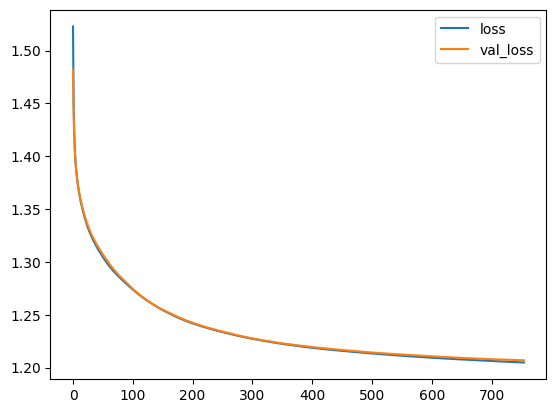

In [13]:
metrics[['loss','val_loss']].plot()

In [14]:
y_preds=tf.argmax(model.predict(X_test),axis=1)

92/92 [==============================] - 0s 2ms/step


In [15]:
print(classification_report(tf.argmax(y_test,axis=1),y_preds))

              precision    recall  f1-score   support

           0       0.36      0.43      0.39       770
           1       0.35      0.20      0.26       661
           2       0.49      0.50      0.49       721
           3       0.56      0.64      0.60       784

    accuracy                           0.45      2936
   macro avg       0.44      0.44      0.44      2936
weighted avg       0.44      0.45      0.44      2936



In [16]:
print(confusion_matrix(tf.argmax(y_test,axis=1),y_preds))

[[333 106 128 203]
 [234 134 193 100]
 [170 103 359  89]
 [185  40  54 505]]


In [17]:
tf.argmax(model.predict([[0., 0., 0., 6., 0.,3.,5.,6.]]),axis=1)

1/1 [==============================] - 0s 90ms/step


<tf.Tensor: shape=(1,), dtype=int64, numpy=array([2], dtype=int64)>